In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import math
import numpy as np

class DataSet():
    def __init__(self, num_words=None, seed=113, maxlen=100, train_portion=0.5, long_first=False):
        """
        :param num_words: Size of vocabulary, all words out-of-vocabulary will be marked as [unk]
        :param seed: Seed for randomly shuffling dataset
        :param maxlen: Maximum length of review, reviews longer than maxlen will be truncated, reviews shorter than
        maxlen will be padded to maxlen
        :param train_portion: Portion of dataset to allocate to training data, test data will be 1-train_portion
        :param long_first: Sort reviews by length
        """
        # retrieve IMDb data, x is a sequence containing movie review,
        # y is a label indicating if it is positive or negative sentiment
        (self.x_train, self.y_train), (self.x_test, self.y_test) = imdb.load_data(num_words=num_words, seed=seed)

        if long_first:
            self.y_train = [y for _, y in sorted(zip(self.x_train, self.y_train), key=lambda s: len(s[0]), reverse=True)]
            self.x_train = sorted(self.x_train, key=len, reverse=True)

            self.y_test = [y for _, y in sorted(zip(self.x_test, self.y_test), key=lambda s: len(s[0]), reverse=True)]
            self.x_test = sorted(self.x_test, key=len, reverse=True)

        self.total_length = [len(x) for x in self.x_train]
        temp = [len(x) for x in self.x_test]
        self.total_length.extend(temp)

        # padding sequences to all be of the same length
        self.x_train = pad_sequences(self.x_train, maxlen=maxlen, padding='post', truncating='post')
        self.x_test = pad_sequences(self.x_test, maxlen=maxlen, padding='post', truncating='post')

        self.split_data(train_portion)

        self.word_index = imdb.get_word_index()
        self.word_to_index = {word:id + 3 for word, id in self.word_index.items()}
        self.word_to_index["[pad]"] = 0
        self.word_to_index["[start]"] = 1
        self.word_to_index["[unk]"] = 2
        self.word_to_index["[unused]"] = 3
        self.index_to_word = {i:word for (word, i) in self.word_to_index.items()}
        self.form_vocab()

    def form_vocab(self):
        i2w_vocab = {}
        w2i_vocab = {}

        for sentence in self.x_train:
            for id in sentence:
                if id not in i2w_vocab:
                    word = self.index_to_word[id]
                    i2w_vocab[id] = word
                    w2i_vocab[word] = id

        for sentence in self.x_test:
            for id in sentence:
                if id not in i2w_vocab:
                    word = self.index_to_word[id]
                    i2w_vocab[id] = word
                    w2i_vocab[word] = id
        self.i2w_vocab = i2w_vocab
        self.w2i_vocab = w2i_vocab

    def get_data(self):
        return (self.x_train, self.y_train), (self.x_test, self.y_test), (self.train_length, self.test_length)

    def get_vocab_length(self):
        return len(self.i2w_vocab)

    # splits data into ratio train:test -> (train_portion:1-train_portion)
    def split_data(self, train_portion):
        x = np.concatenate((self.x_train, self.x_test), axis=0)
        y = np.concatenate((self.y_train, self.y_test), axis=0)
        self.train_length, self.test_length = self.total_length[:math.floor(train_portion * len(x))], \
                                              self.total_length[math.floor(train_portion * len(x)):]
        self.x_train, self.x_test = x[:math.floor(train_portion * len(x))], \
                                    x[math.floor(train_portion * len(x)):]
        self.y_train, self.y_test = y[:math.floor(train_portion * len(y))], \
                                    y[math.floor(train_portion * len(y)):]
        return None


2024-01-03 13:54:54.708669: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [157]:
import numpy
import random
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import models, Model
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap
import multiprocessing
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.keras import models, Model
import numpy as np
from numba import guvectorize,cuda,jit
def f(x,r):
    x_1=x
    x_s=x+1e-7
    i=1
    while i<3200/32*3*2:
        x_1=r*x_1*(1- np.tanh(x_1))
        x_s=r*x_s*(1- np.tanh(x_s))
        i+=1
    return abs(x_1-x_s)
x=[]
for a in np.linspace(3.1, 20,874):
    xx=[]
    for j in range(50,200):
        xx.append(f(j/50,a))
    x.append(xx)

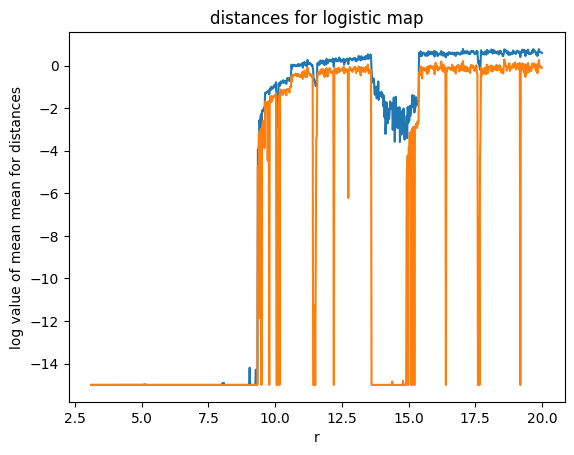

In [158]:
from scipy.stats import gmean
dis=[np.log(np.mean(x[i])+np.exp(-15)) for i in range(874)]
d=[np.log(gmean(x[i])+np.exp(-15)) for i in range(874)]
plt.plot(np.linspace(3.1, 20,874),dis)
plt.plot(np.linspace(3.1, 20,874),d)
plt.xlabel('r')
plt.ylabel('log value of mean mean for distances')
plt.title('distances for logistic map')

with open('tah.pkl','wb') as f:
    pickle.dump(x,f)

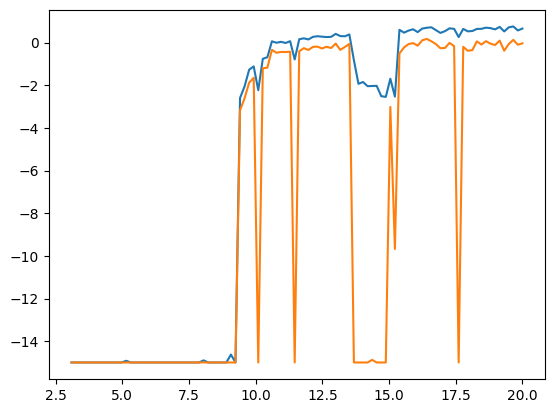

In [70]:
dis=[np.log(np.mean(x[i])+np.exp(-15)) for i in range(100)]
d=[np.log(gmean(x[i])+np.exp(-15)) for i in range(100)]
plt.plot(np.linspace(3.1, 20,100),dis)
plt.plot(np.linspace(3.1, 20,100),d)

np.exp(-14)

(1, 500)

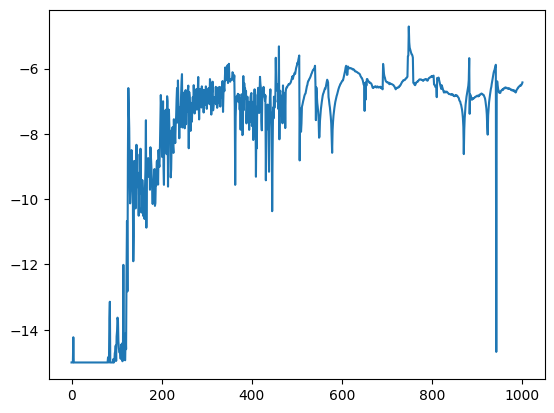

In [28]:
abaa=list()
for i in range(992+9):
    path='LTS/stm1total1'+str(i+1)+'_.pkl'
    with open(path, 'rb') as f:
        abaa.append(np.reshape(pickle.load(f),(1,500)))
x=abaa
for i in range(len(x)):
    for j in range(len(x[i][-1])):
        if x[i][-1][j]<2e-6:
            x[i][-1][j]=+np.exp(-15)
xx=[np.log(gmean(x[i][-1])) for i in range(len(x))]
len(xx)
plt.plot(xx)
np.shape(x[-1])

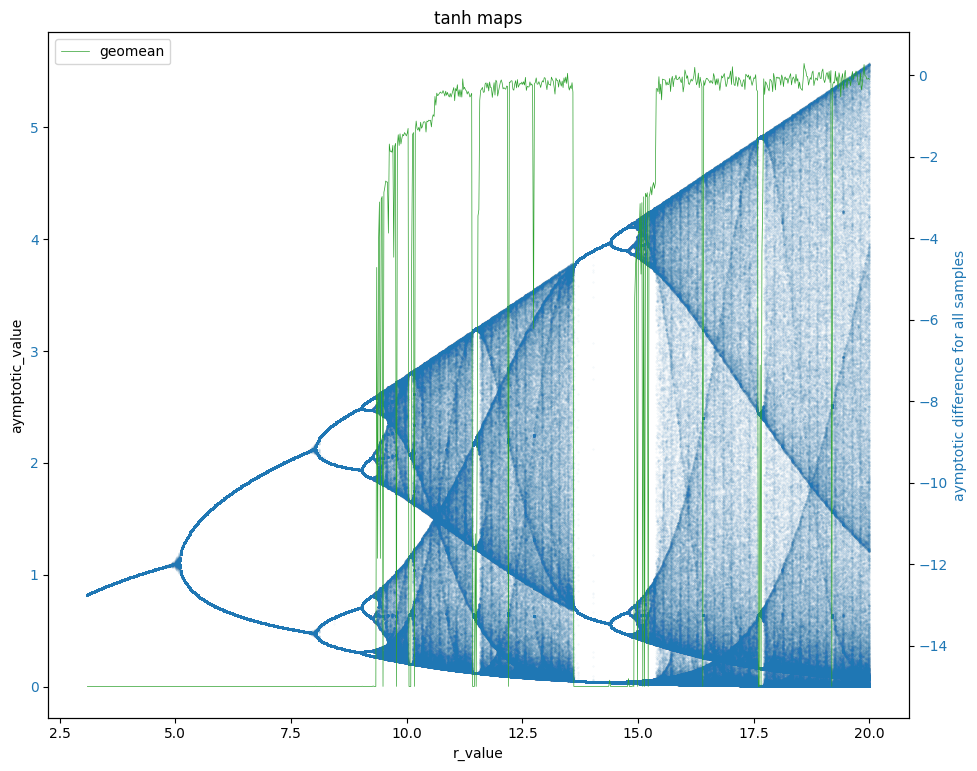

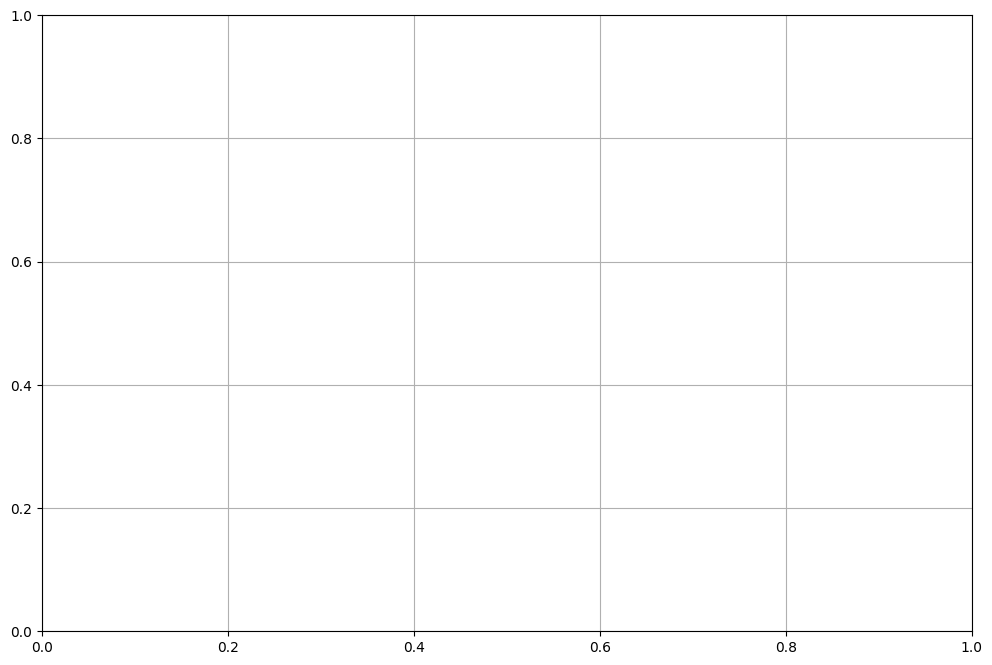

In [161]:
import numpy as np
def logisticmapmodel(r):
    n=2000
    li=[]
    x=np.random.uniform(0,1)
    x_1=r*x*(1- np.tanh(x))
    li.append(x)
    li.append(x_1)
    while n>0:
        x=x_1
        x_1=r*x*(1- np.tanh(x))
        li.append(x_1)
        n-=1
    return li[50:]
    
y=[]
x=[]
for r in np.linspace(3.1, 20,874):
    y.append(logisticmapmodel(r))
    x.append([r])
for j in range(len(x)):
    x[j]=x[j]*len(logisticmapmodel(2))
    
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(11.1,8.9))
ax1.set_xlabel('r_value')
ax1.set_ylabel('aymptotic_value')
ax1.scatter(x,y,s=0.09, alpha=0.09)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
ax2.set_ylabel('aymptotic difference for all samples', color=color)  
#ax2.plot(np.linspace(3.1, 20,874), dis, color='tab:green', lw=0.5, label="mean")
ax2.plot(np.linspace(3.1, 20,874), d, color='tab:green', lw=0.5, label="geomean")
ax2.tick_params(axis='y', labelcolor=color)
#ax2.grid(True)
ax2.legend(loc='upper left')

plt.title('tanh maps')
plt.figure(figsize=(12,8))
plt.grid(True)
plt.show()

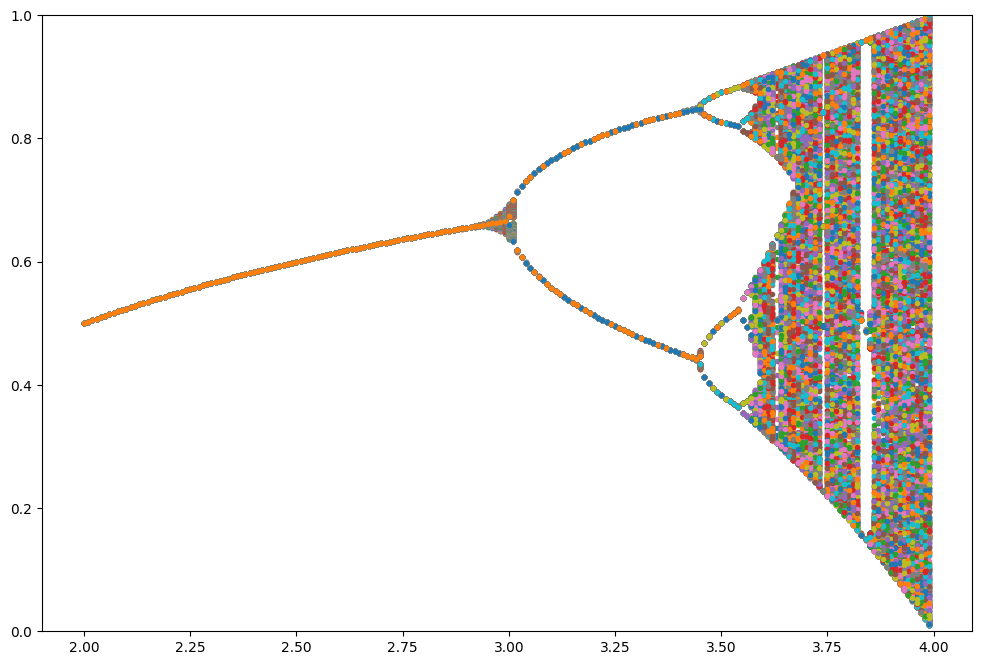

In [73]:
import numpy as np
def logisticmapmodel(r):
    n=1000
    li=[]
    x=np.random.uniform(0,1)
    x_1=x*(1-x)*r
    li.append(x)
    li.append(x_1)
    while n>0:
        x=x_1
        x_1=x*(1-x)*r
        li.append(x_1)
        n-=1
    return li[50:]
    
y=[]
x=[]
for r in range(200,400):
    y.append(logisticmapmodel(r/100))
    x.append([r/100])
for j in range(len(x)):
    x[j]=x[j]*len(logisticmapmodel(2))
    
    
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.ylim(0,1)
plt.plot(x,y,'.')

plt.show()